# Laboratorio 9. Gale-Shapley and Irving Algorithms.

Nombre: Simón Aparicio Bocanegra.

1) Find the best and worst cases fro the Gale-Shapley and Irving ( An Efficient Algorithm for the “Stable Roommates” Problem) Algorithms and run in Colab these algorithms for those cases for n=4, and 40.

## Problema del matrimonio estable (SMP). Algoritmo Gale-Shapley.

A continuación encontramos la implementación del algoritmo Gale-Shapley para el problema del matrimonio estable (SMP).

In [1]:
def prefers_over_gale(prefer, w, m1, m2):
    n = len(prefer)//2
    for i in range(n): 
        if (prefer[w][i] == m1): 
            return True

        if (prefer[w][i] == m2): 
            return False
  
def gale(prefer):
    n = len(prefer)//2

    match = [-1 for i in range(n)] #women only 
    free = [True for i in range(n)] #men only 
  
    freecount = n
    proposals = 0

    while (freecount > 0): 
        m = 0
        while m < n-1: 
            if free[m]: 
                break
            m += 1
  
        i = 0
        while i < n and free[m]: 
            w = prefer[m][i]

            if match[w-n] == -1: 
                match[w-n] = m 
                free[m] = False
                freecount -= 1
                proposals += 1
  
            else: 
                m1 = match[w-n]
  
                if prefers_over_gale(prefer, w, m, m1):
                    match[w-n] = m 
                    free[m] = False
                    free[m1] = True
                    proposals += 1
                
            i += 1
          
            
  
    return [match,proposals]

Esta implementación necesita codificar a aquellos que realizan las propuestas entre 0 y n-1 y a aquellos que las reciben entre n y 2n-1. La función recibe una lista de preferencias y retorna la lista de propuestas escogidas y el número de propuestas necesarias durante el proceso.

Veamos un ejemplo:

In [2]:
prefer = [[7, 5, 6, 4], [5, 4, 6, 7], 
          [4, 5, 6, 7], [4, 5, 6, 7], 
          [0, 1, 2, 3], [0, 1, 2, 3], 
          [0, 1, 2, 3], [0, 1, 2, 3]] 

print('Mujeres:\t',[list(range(len(prefer)//2,len(prefer))),'# proposals'])
print('Hombres:\t',gale(prefer))

Mujeres:	 [[4, 5, 6, 7], '# proposals']
Hombres:	 [[2, 1, 3, 0], 4]


Analicemos ahora el mejor y peor caso posible para n = 4 (4 mujeres y 4 hombres):


In [3]:
best_case = [[4, 5, 6, 7],
             [5, 6, 7, 4],
             [6, 7, 4, 5],
             [7, 4, 5, 6],
             [0, 1, 2, 3],
             [1, 2, 3, 0],
             [2, 3, 0, 1],
             [3, 0, 1, 2]]

worst_case = [[4, 5, 6, 7],
              [5, 6, 4, 7],
              [6, 4, 5, 7],
              [4, 5, 6, 7],
              [1, 2, 3, 0],
              [2, 3, 0, 1],
              [3, 0, 1, 2],
              [0, 1, 2, 3]]

print('Mejor caso:')
print('Mujeres:\t',[list(range(len(best_case)//2,len(best_case))),'# propuestas'])
print('Hombres:\t',gale(best_case))

print('\nPeor caso:')
print('Mujeres:\t',[list(range(len(worst_case)//2,len(worst_case))),'# propuestas'])
print('Hombres:\t',gale(worst_case)) 

Mejor caso:
Mujeres:	 [[4, 5, 6, 7], '# propuestas']
Hombres:	 [[0, 1, 2, 3], 4]

Peor caso:
Mujeres:	 [[4, 5, 6, 7], '# propuestas']
Hombres:	 [[1, 2, 3, 0], 13]


Ahora analicemos el mejor y el peor caso para n = 40.

In [4]:
n = 40

best_case = [list(range(i,2*n))+list(range(n,i)) for i in range(n,2*n)] + [list(range(i,n))+list(range(i)) for i in range(n)]

worst_case = [list(range(i,2*n-1))+list(range(n,i))+[2*n-1] for i in range(n,2*n)] + [list(range((i+1),n))+list(range(i))+[i] for i in range(n)]

# print(worst)

print('Mejor caso:')
print('Mujeres:\t',[list(range(len(best_case)//2,len(best_case))),'# propuestas'])
print('Hombres:\t',gale(best_case))

print('\nPeor caso:')
print('Mujeres:\t',[list(range(len(worst_case)//2,len(worst_case))),'# propuestas'])
print('Hombres:\t',gale(worst_case)) 

Mejor caso:
Mujeres:	 [[40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79], '# propuestas']
Hombres:	 [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39], 40]

Peor caso:
Mujeres:	 [[40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79], '# propuestas']
Hombres:	 [[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 0], 1561]


## Problema del compañero estable (SRP). Algoritmo Irving.

A continuación encontramos la implementación del algoritmo Irving para el problema del compañero estable (SMP). Este problema presenta complicaciones que el SMP no presenta, por ejemplo, existen listas de preferencias que no tienen solución, es decir, no tienen una solución estable, es por eso necesario crear una función que sea capaz de identificar si la solución dada es o no estable (`check_stability_irving(prefer, mate)`), existen además combinaciones no estables en donde el algoritmo se queda atrapado e itera sobre una serie de preferencias de manera ciclica, por lo tanto un contador que vigila el número de iteraciones es capaz de sacar del proceso si las iteraciones son muy muchas.

In [5]:
def prefers_over_irving(prefer, prop, m1, m2):
    n = len(prefer)
    for i in range(n):
        if prefer[prop][i] == m1:
            return True
        if prefer[prop][i] == m2:
            return False


def irving(prefer):
    n = len(prefer)

    free = [True for i in range(n)]
    mate = [-1 for i in range(n)]

    freecount = n

    proposals = 0

    mxiter = 100
    iter = 0

    while freecount > 0:
        iter += 1
        if(iter > mxiter):
            return [list(range(n)),0]

        m = 0
        while m<n-1:
            if free[m]:
                break
            m+=1
        
        i=0
        while i<n and free[m]:
            prop = prefer[m][i]
            if mate[prop] == -1:
                mate[prop] = m
                mate[m] = prop
                free[m] = False
                free[prop] = False
                freecount -= 2
            
            else:
                if prefers_over_irving(prefer,prop,m,mate[prop]):
                    free[mate[prop]] = True
                    mate[mate[prop]] = -1
                    mate[prop] = m
                    mate[m] = prop
                    free[m] = False
            
            proposals += 1
            
            i+=1
        
        #print(proposals, mate)

    return [mate, proposals]

def check_stability_irving(prefer, mate):
    n = len(prefer)

    if mate == list(range(n)):
        return False

    for i in range(n):
        for m in prefer[i]:
            if m == mate[i]:
                break
            for j in prefer[m]:
                if j == mate[m]:
                    break
                if j == i:
                    return False

    return True

Dentro de la libreria `matching` existe tambien una función que ejecuta el algoritmo para obtener las parejas resultantes con la que podemos comparar resultados, recordando que para un conjunto de preferencias existen varios emparejamientos estables.

In [6]:
!pip install matching


Veamos algunos ejemplos:

In [7]:
prefers = []

prefers.append([[5,4,7,1,2,3,6],
                [2,5,4,6,7,0,3],
                [3,6,1,7,0,5,4],
                [4,7,2,0,5,6,1],
                [1,0,3,5,6,7,2],
                [6,1,0,2,3,4,7],
                [7,2,5,3,4,1,0],
                [0,3,6,4,1,2,5]])

prefers.append([[4,2,5,1,3],
                [2,0,4,3,5],
                [3,5,1,0,4],
                [1,0,2,5,4],
                [5,2,3,0,1],
                [0,1,3,4,2]])

prefers.append([[1,2,3],
                [2,3,0],
                [3,1,0],
                [1,2,0]])

from matching.games import StableRoommates

for pr in prefers:
    print('Participants:\t',[list(range(len(pr))), "# propuestas"])
    print('Matching:\t',irving(pr))
    print('Stability:\t',check_stability_irving(pr,irving(pr)[0]))
    print('Library:\t',StableRoommates.create_from_dictionary(dict(enumerate(pr))).solve(),'\n')

Participants:	 [[0, 1, 2, 3, 4, 5, 6, 7], '# propuestas']
Matching:	 [[5, 2, 1, 4, 3, 0, 7, 6], 4]
Stability:	 True
Library:	 {0: 7, 1: 4, 2: 3, 3: 2, 4: 1, 5: 6, 6: 5, 7: 0} 

Participants:	 [[0, 1, 2, 3, 4, 5], '# propuestas']
Matching:	 [[4, 3, 5, 1, 0, 2], 11]
Stability:	 False
Library:	 {0: None, 1: 2, 2: 3, 3: 1, 4: None, 5: None} 

Participants:	 [[0, 1, 2, 3], '# propuestas']
Matching:	 [[1, 0, 3, 2], 2]
Stability:	 False
Library:	 {0: None, 1: None, 2: None, 3: None} 



/usr/local/lib/python3.6/dist-packages/matching/algorithms/stable_roommates.py:101: NoStableMatchingWarning: The following players have emptied their preference list: [0, 4, 5]
  "The following players have emptied their preference list: "
/usr/local/lib/python3.6/dist-packages/matching/algorithms/stable_roommates.py:141: NoStableMatchingWarning: The following players have been rejected by all others, emptying their preference list: [0]
  "The following players have been rejected by all others, "
/usr/local/lib/python3.6/dist-packages/matching/algorithms/stable_roommates.py:101: NoStableMatchingWarning: The following players have emptied their preference list: [0, 1, 2, 3]
  "The following players have emptied their preference list: "


Analicemos ahora el mejor y peor caso posible para n = 4:


In [8]:
best_case = [[1, 2, 3],
             [0, 2, 3],
             [3, 0, 1],
             [2, 0, 1]]

worst_case = [[1, 2, 3],
              [2, 3, 0],
              [0, 1, 3],
              [1, 2, 0]]

best_res = irving(best_case)
print('Participants:\t',[list(range(len(best_case))), "# propuestas"])
print('Matching:\t',best_res)
print('Stability:\t',check_stability_irving(best_case,best_res[0]),'\n')

worst_res = irving(worst_case)
print('Participants:\t',[list(range(len(worst_case))), "# propuestas"])
print('Matching:\t',worst_res)
print('Stability:\t',check_stability_irving(worst_case,worst_res[0]),'\n')

Participants:	 [[0, 1, 2, 3], '# propuestas']
Matching:	 [[1, 0, 3, 2], 2]
Stability:	 True 

Participants:	 [[0, 1, 2, 3], '# propuestas']
Matching:	 [[2, 3, 0, 1], 7]
Stability:	 True 



Ahora analicemos el mejor caso para n = 40.

In [9]:
n = 40

best_case = [[i+(-1)**i]+list(range(min(i,i+(-1)**i)))+list(range(max(i,i+(-1)**i)+1,n)) for i in range(n)]

best_res = irving(best_case)
print('Participants:\t',[list(range(len(best_case))), "# propuestas"])
print('Matching:\t',best_res)
print('Stability:\t',check_stability_irving(best_case,best_res[0]),'\n')

Participants:	 [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39], '# propuestas']
Matching:	 [[1, 0, 3, 2, 5, 4, 7, 6, 9, 8, 11, 10, 13, 12, 15, 14, 17, 16, 19, 18, 21, 20, 23, 22, 25, 24, 27, 26, 29, 28, 31, 30, 33, 32, 35, 34, 37, 36, 39, 38], 20]
Stability:	 True 



2) Run the Gale-Shapley Algorithm 100 times using random permutations as preference lists for n=4 and 40. Find the minimum, maximum and average number of iterations and plot the distribution of the number of iterations.

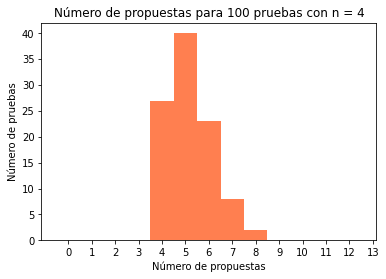

Número máximo de propuestas:  8
Número mínimo of iterations:  4
Número promedio de propuestas:  5.18


In [10]:
from collections import defaultdict
import numpy as np
import random as r
import matplotlib.pyplot as plt

n = 4
tries = 100

hist= np.zeros((13),dtype=np.int)
proposals = []

for i in range(tries):
    
    pref = [list(np.random.permutation(n)+n) for i in range(n)]+[list(np.random.permutation(n)) for i in range(n)]
    res = gale(pref)
    hist[res[1]]+=1
    proposals.append(res[1])

plt.hist(list(map(str,range(13))),bins=list(map(str,range(14))),align='left',color='coral',weights=hist) #Histograma
plt.title('Número de propuestas para 100 pruebas con n = 4')
plt.ylabel('Número de pruebas')
plt.xlabel('Número de propuestas')
plt.show()

print("Número máximo de propuestas: ", max(proposals))
print("Número mínimo of iterations: ", min(proposals))
print("Número promedio de propuestas: ", sum(proposals)/tries)

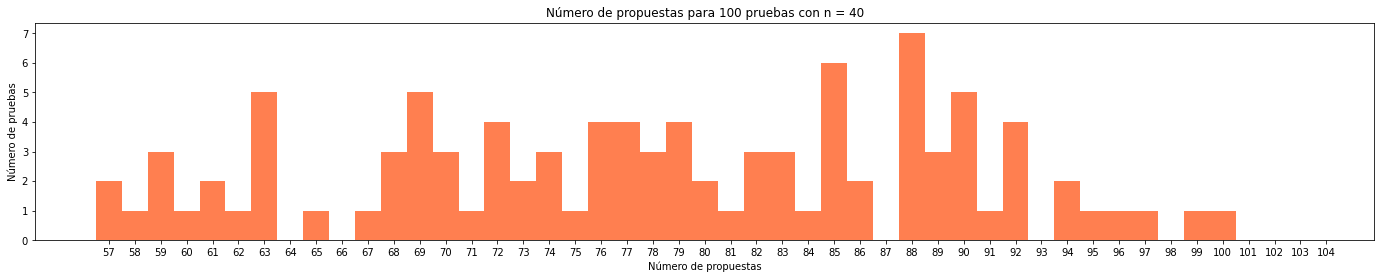

Número máximo de propuestas:  104
Número mínimo of iterations:  57
Número promedio de propuestas:  78.36


In [11]:
n = 40
tries = 100

hist= np.zeros((1561),dtype=np.int)
proposals = []

for i in range(tries):
    
    pref = [list(np.random.permutation(n)+n) for i in range(n)]+[list(np.random.permutation(n)) for i in range(n)]
    res = gale(pref)
    hist[res[1]]+=1
    proposals.append(res[1])

plt.figure(figsize=(24,4))
plt.hist(list(map(str,range(min(proposals),max(proposals)))),bins=list(map(str,range(min(proposals),max(proposals)+1))),align='left',color='coral',weights=hist[min(proposals):max(proposals)]) #Histograma
plt.title('Número de propuestas para 100 pruebas con n = 40')
plt.ylabel('Número de pruebas')
plt.xlabel('Número de propuestas')
plt.show()

print("Número máximo de propuestas: ", max(proposals))
print("Número mínimo of iterations: ", min(proposals))
print("Número promedio de propuestas: ", sum(proposals)/tries)